In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df_final = pd.read_csv('SofwareDeveloperIncomeExpensesperUSACity.csv')
df_final.head(3)

,Unnamed: 0,Metro,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,City,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,0,"Columbus, OH",117552.0,108500.0,51260.0,13430.0,192000.0,"Columbus, OH",984.8,1421.5,2856.5,9335.4
1,1,"Seattle-Tacoma-Bellevue, WA",117323.0,131167.0,65400.0,65760.0,491600.0,"Seattle, WA",1250.7,2528.2,4091.5,8971.3
2,2,"Charlotte-Concord-Gastonia, NC-SC",114122.0,107046.0,51000.0,12800.0,208500.0,"Charlotte, NC",989.9,1974.5,3221.1,8939.8


In [ ]:
de_para_novos_nomes = {
    'Mean Software Developer Salary (unadjusted)'   : 'vl_salario',
    'Number of Software Developer Jobs'             : 'nr_empregos',
    'Median Home Price'                             : 'vl_moradia',
    # 'City'                                          : 'nm_cidade',
    'Cost of Living avg'                            : 'vl_custo_vida',
    'Rent avg'                                      : 'vl_aluguel',
    'Local Purchasing Power avg'                    : 'vl_poder_compra'
}
df_final.rename(columns=de_para_novos_nomes, inplace=True)
df_final.head(3)

,Unnamed: 0,Metro,Mean Software Developer Salary (adjusted),vl_salario,Mean Unadjusted Salary (all occupations),nr_empregos,vl_moradia,City,vl_custo_vida,vl_aluguel,Cost of Living Plus Rent avg,vl_poder_compra
0,0,"Columbus, OH",117552.0,108500.0,51260.0,13430.0,192000.0,"Columbus, OH",984.8,1421.5,2856.5,9335.4
1,1,"Seattle-Tacoma-Bellevue, WA",117323.0,131167.0,65400.0,65760.0,491600.0,"Seattle, WA",1250.7,2528.2,4091.5,8971.3
2,2,"Charlotte-Concord-Gastonia, NC-SC",114122.0,107046.0,51000.0,12800.0,208500.0,"Charlotte, NC",989.9,1974.5,3221.1,8939.8


In [ ]:
df_final.corr()
print('Notas observações:  \n\t* As variáveis com maior correlação com o salário são "nr_empregos" e "vl_moradia".\n' + 
                            '\t* As variáveis "vl_custo_vida", "vl_poder_compra" demonstraram menor correlação em relação ao salário.\n'
                            '\t* A variável "vl_aluguel" teve baixíssima correlação e apresentando-se negativa.\n')

<ipython-input-8-26c39ad516ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,Unnamed: 0,Mean Software Developer Salary (adjusted),vl_salario,Mean Unadjusted Salary (all occupations),nr_empregos,vl_moradia,vl_custo_vida,vl_aluguel,Cost of Living Plus Rent avg,vl_poder_compra
Unnamed: 0,1.000000,-0.969919,-0.647816,-0.280424,-0.266531,-0.195983,-0.011762,-0.051200,-0.133584,-0.279848
Mean Software Developer Salary (adjusted),-0.969919,1.000000,0.618748,0.256262,0.271436,0.123461,0.001220,0.050742,0.112387,0.317559
vl_salario,-0.647816,0.618748,1.000000,0.837704,0.784464,0.785842,0.152999,-0.019006,-0.010738,0.349720
Mean Unadjusted Salary (all occupations),-0.280424,0.256262,0.837704,1.000000,0.816883,0.835459,0.112083,0.003229,-0.123182,0.312406
nr_empregos,-0.266531,0.271436,0.784464,0.816883,1.000000,0.652009,0.170448,-0.021038,-0.089473,0.339211
vl_moradia,-0.195983,0.123461,0.785842,0.835459,0.652009,1.000000,0.126911,-0.019267,-0.063559,0.199677
vl_custo_vida,-0.011762,0.001220,0.152999,0.112083,0.170448,0.126911,1.000000,-0.017873,-0.029944,-0.002585
vl_aluguel,-0.051200,0.050742,-0.019006,0.003229,-0.021038,-0.019267,-0.017873,1.000000,-0.039798,-0.009309
Cost of Living Plus Rent avg,-0.133584,0.112387,-0.010738,-0.123182,-0.089473,-0.063559,-0.029944,-0.039798,1.000000,-0.206616
vl_poder_compra,-0.279848,0.317559,0.349720,0.312406,0.339211,0.199677,-0.002585,-0.009309,-0.206616,1.000000


Notas observações:  
	* As variáveis com maior correlação com o salário são "nr_empregos" e "vl_moradia".
	* As variáveis "vl_custo_vida", "vl_poder_compra" demonstraram menor correlação em relação ao salário.
	* A variável "vl_aluguel" teve baixíssima correlação e apresentando-se negativa.



In [ ]:
print('Tabela descritiva das variáveis:')
df_final.describe().round(2)

Tabela descritiva das variáveis:


,Unnamed: 0,Mean Software Developer Salary (adjusted),vl_salario,Mean Unadjusted Salary (all occupations),nr_empregos,vl_moradia,vl_custo_vida,vl_aluguel,Cost of Living Plus Rent avg,vl_poder_compra
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,38.00,100832.97,101866.21,53277.27,19098.57,312701.30,1414.06,3280.43,6506.99,7421.23
std,22.37,8064.30,13926.64,7813.34,23858.15,222743.31,2369.54,9118.81,20325.07,1327.44
min,0.00,72811.00,80314.00,44500.00,1120.00,124100.00,832.50,879.30,2241.40,4840.10
25%,19.00,95308.00,91976.00,48240.00,3170.00,178400.00,957.30,1340.50,2810.80,6464.20
50%,38.00,101256.00,100614.00,51050.00,8770.00,243700.00,995.00,1625.80,2999.90,7499.00
75%,57.00,107170.00,109503.00,56160.00,21160.00,366000.00,1086.00,2171.90,3446.90,8153.10
max,76.00,117552.00,142101.00,80480.00,98650.00,1193600.00,15809.20,58597.60,130097.80,10673.70


Aqui podemos visualizar melhor os OUTLIERS.


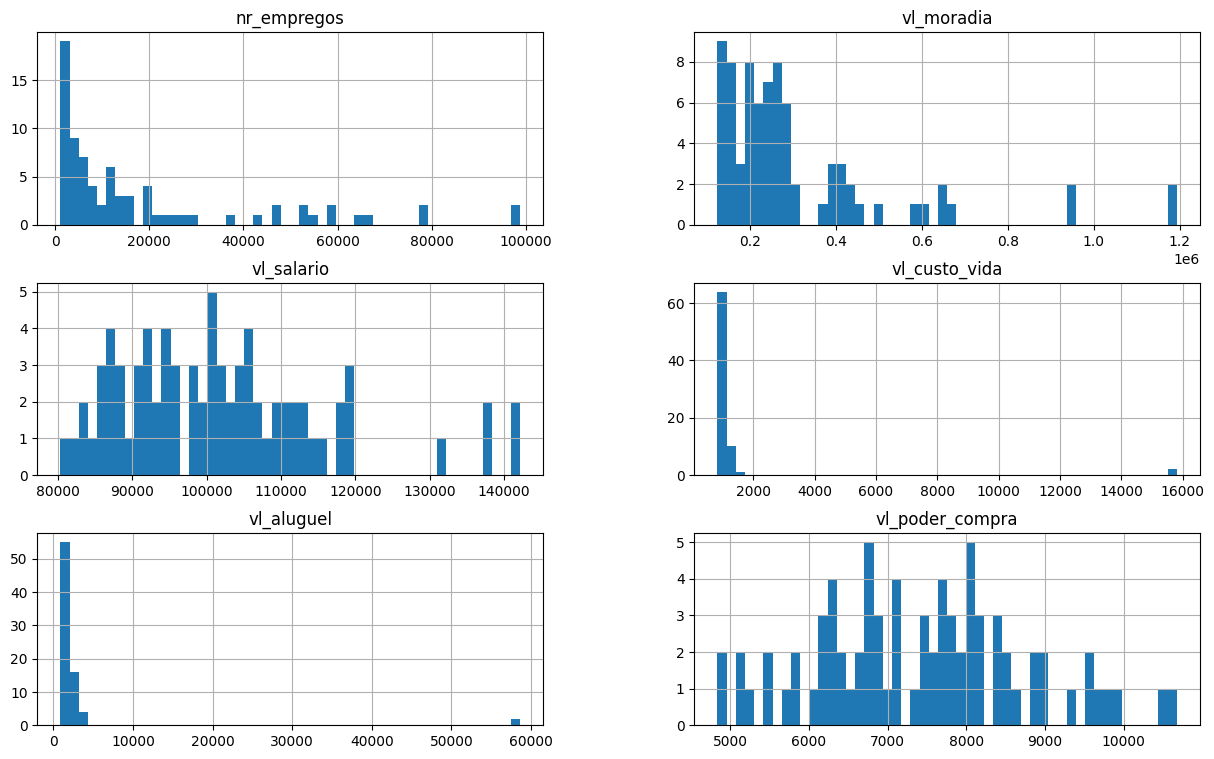

In [ ]:
#Histograma das variáveis
df_final[['nr_empregos', 'vl_moradia', 'vl_salario', 'vl_custo_vida', 'vl_aluguel', 'vl_poder_compra']].hist(figsize=(15,9), bins=50);
print('Aqui podemos visualizar melhor os OUTLIERS.');

<ipython-input-11-accfa6959e0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot = True, cmap= "RdYlGn");


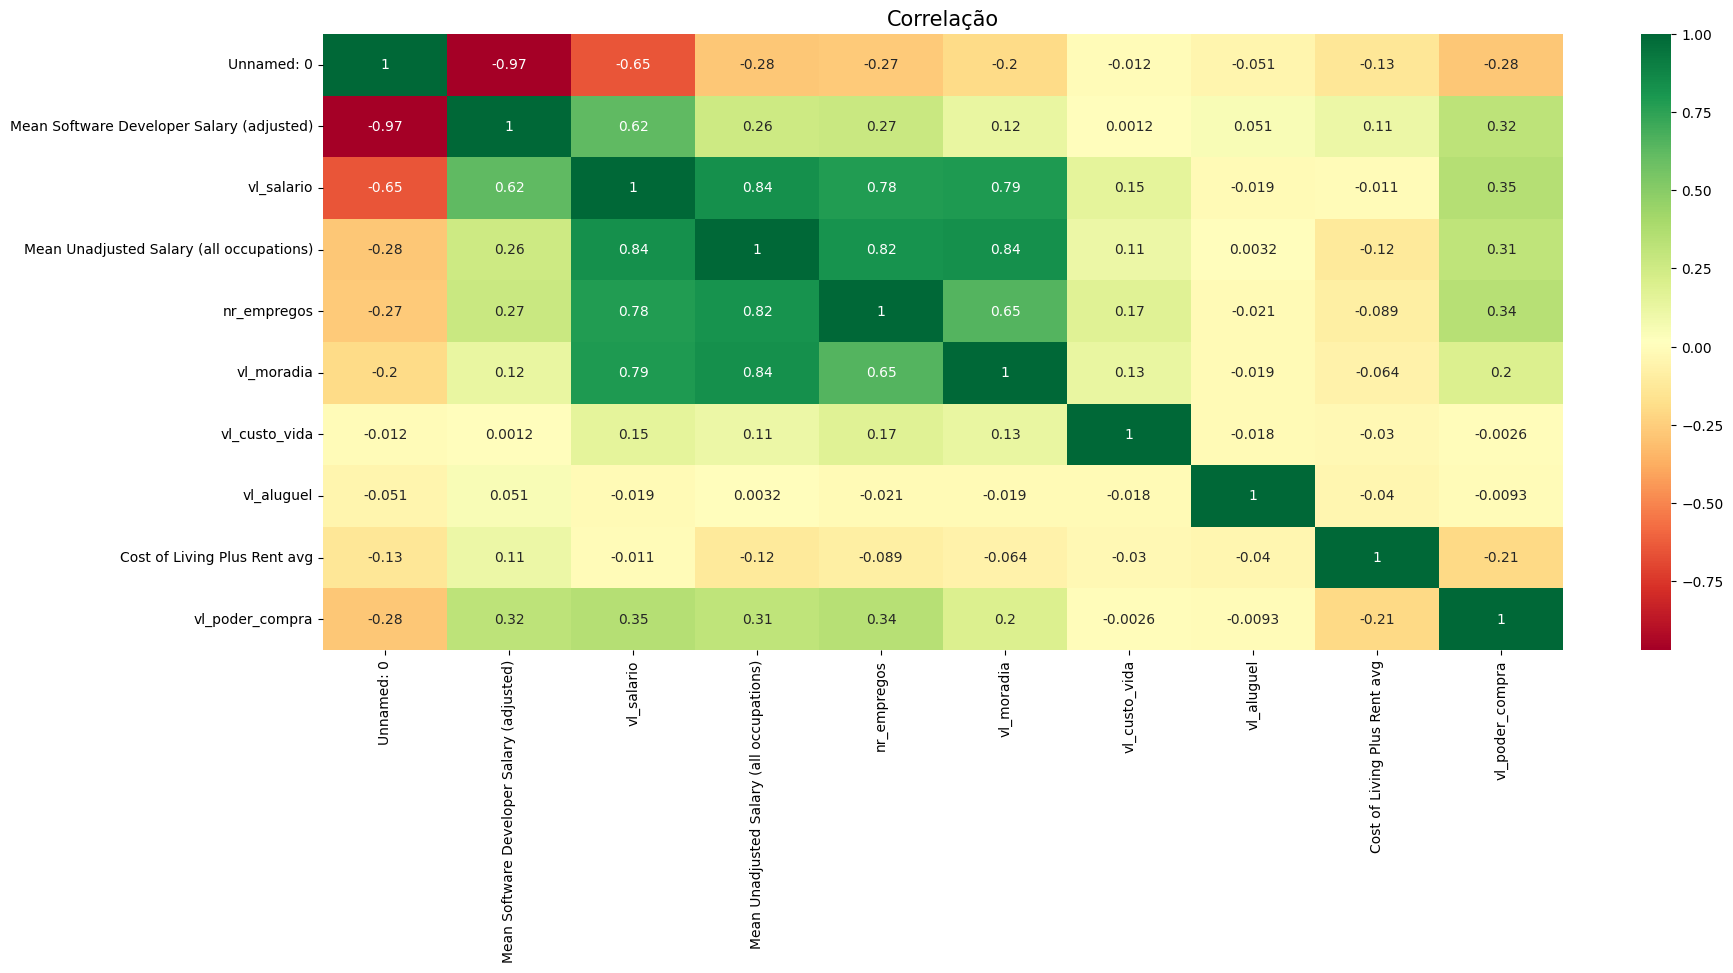

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df_final.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação',size=15);